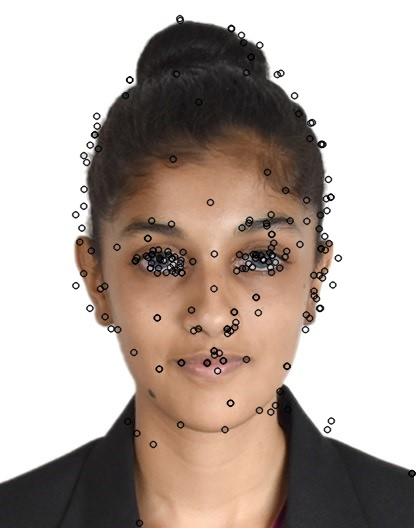

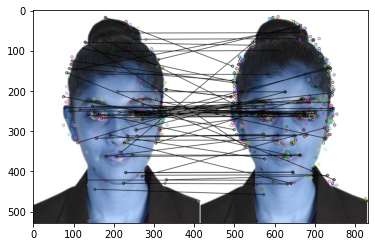

In [ ]:
#PROGRAM 5: FEATURE EXTRACTION

import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

img = cv2.imread('KP Photo.jpg')
grey =cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
nor = sift.detect(img, None)
img2 = cv2.drawKeypoints(img, nor,img,
cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
#cv2.imwrite(&#39;norris-keypoints&#39;, img2)
cv2_imshow(img2)
photo = cv2.imread('KP Photo.jpg')
img.shape
keypoints_1,descriptors_1 = sift.detectAndCompute(photo,None)
keypoints_2,descriptors_2 = sift.detectAndCompute(img,None)
bf = cv2.BFMatcher(cv2.NORM_L1, True)
matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)
img3 = cv2.drawMatches(photo,keypoints_1, img, keypoints_2, matches[:], img, 2)
plt.imshow(img3)
plt.show()



Found automatic threshold t = 0.3989897296465121.


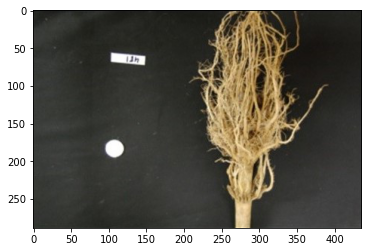

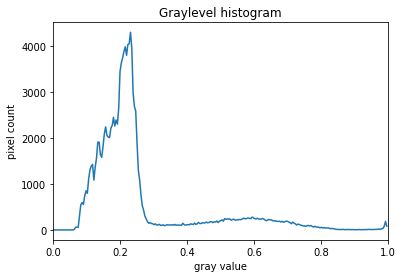

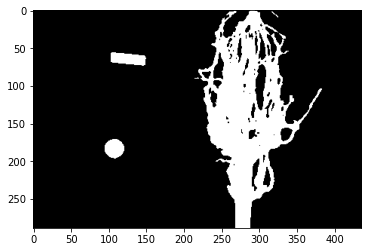

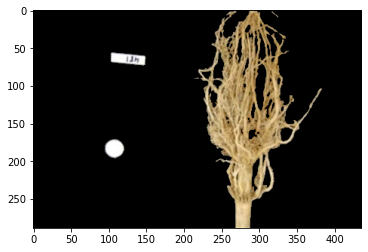

In [ ]:
#REGION GROWING-IMAGE SEGMENTATION USING THRESHOLD
import numpy as np
import glob
import matplotlib.pyplot as plt
import skimage.io
import skimage.color
import skimage.filters

image = skimage.io.imread(fname="/content/maze.jpg")

fig, ax = plt.subplots()
plt.imshow(image)
gray_image = skimage.color.rgb2gray(image)

# blur the image to denoise
blurred_image = skimage.filters.gaussian(gray_image, sigma=1.0)

# show the histogram of the blurred image
histogram, bin_edges = np.histogram(blurred_image, bins=256, range=(0.0, 1.0))
fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Graylevel histogram")
plt.xlabel("gray value")
plt.ylabel("pixel count")
plt.xlim(0, 1.0)
t = skimage.filters.threshold_otsu(blurred_image)
print("Found automatic threshold t = {}.".format(t))


# create a binary mask with the threshold found by Otsu's method
binary_mask = blurred_image > t

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap="gray")
selection = image.copy()
selection[~binary_mask] = 0

fig, ax = plt.subplots()
plt.imshow(selection)







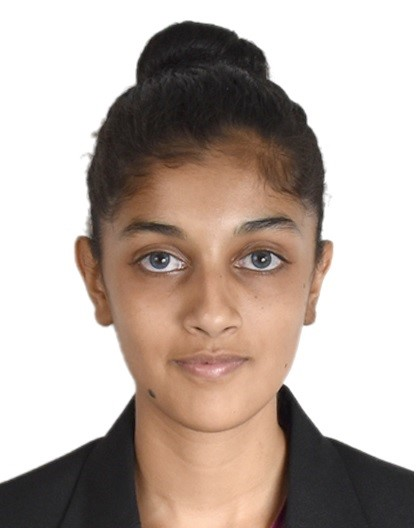

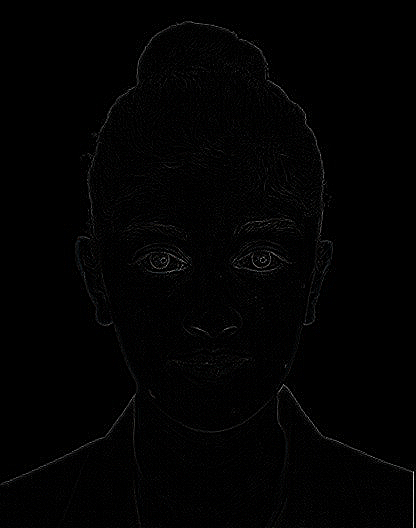

In [ ]:
#EDGE DECTECTION

import cv2
import numpy as np
import skimage.color
from google.colab.patches import cv2_imshow
img = cv2.imread('KP Photo.jpg')

laplacian = np.array([[0,1,0],
[1,-4,1],
[0,1,0]])

temp = cv2.filter2D(img,-1,laplacian)

cv2_imshow(img)
cv2_imshow(temp)

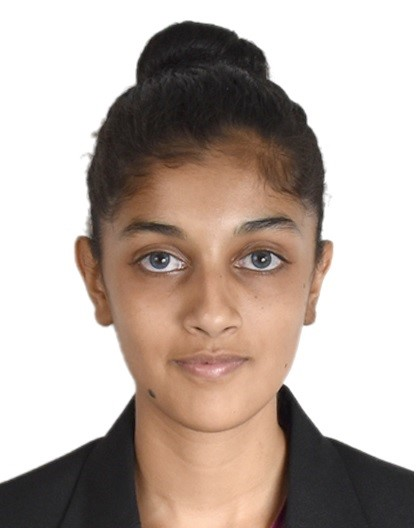

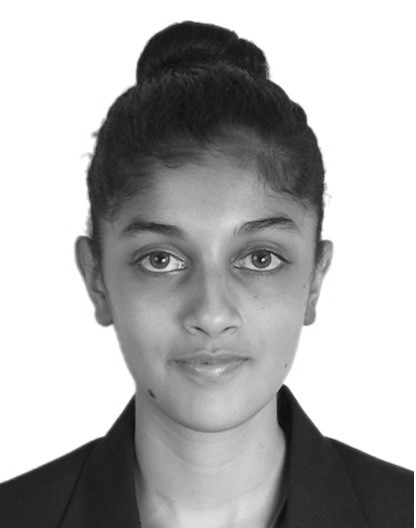

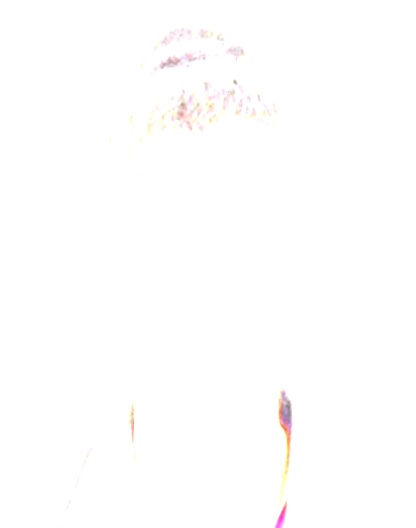

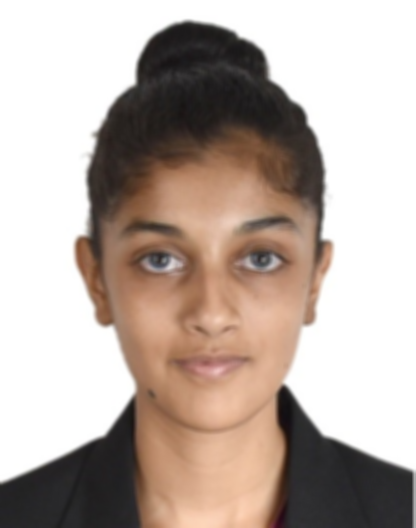

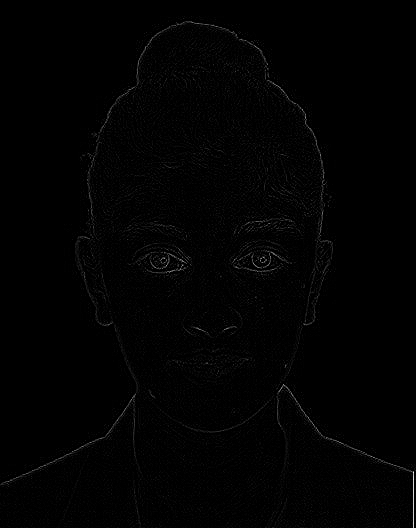

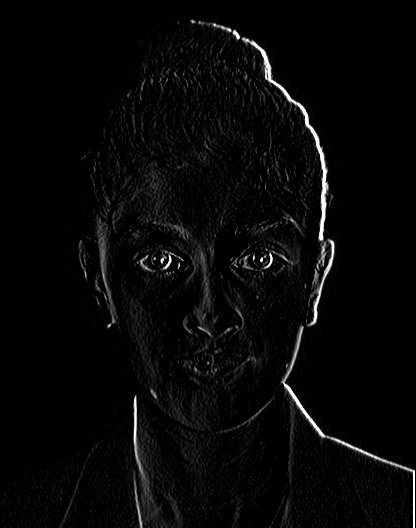

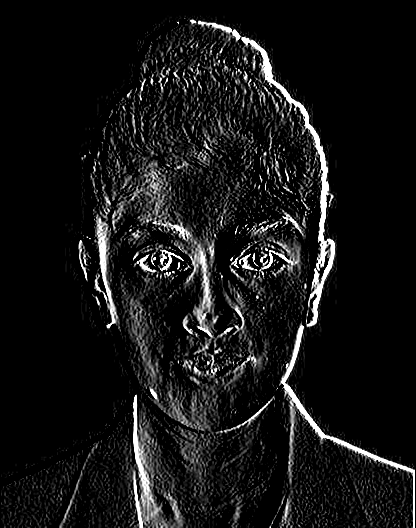

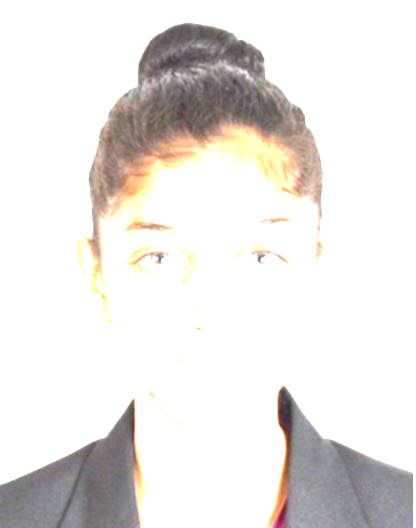

In [ ]:
#SPATIAL FILTER

import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
img = cv2.imread('KP Photo.jpg')
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img)
cv2_imshow(img2)

mean_filter = np.ones((3,3))
gaussian_filter = cv2.getGaussianKernel(5,10)
g = gaussian_filter*gaussian_filter.T

scharr = np.array([[-3, 0, 3],
[-10,0,10],
[-3, 0, 3]])
sobel= np.array([[-1, 0, 1],
[-2, 0, 2],
[-1, 0, 1]])
laplacian=np.array([[0, 1, 0],
[1,-4, 1],
[0, 1, 0]])
custom1 = np.array([[0.3,0.3,0.3],
[0.2,0.6,0.4],
[0.4,0.4,0.6]])

# Mean Filter
temp = cv2.filter2D(img, -5, mean_filter)
cv2_imshow(temp)

#Gaussian Filter
temp = cv2.filter2D(img, -5, g)
cv2_imshow(temp)

# Laplacian Filter
temp = cv2.filter2D(img2, -5, laplacian)
cv2_imshow(temp)

# Sobel Filter
temp = cv2.filter2D(img2, -5, sobel)
cv2_imshow(temp)

# Scharr Filter
temp = cv2.filter2D(img2, -5, scharr)
cv2_imshow(temp)

# Custom Filter
temp = cv2.filter2D(img, -5, custom1)
cv2_imshow(temp)

In [ ]:
#LINE DETECTION
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
img = cv2.imread('lane.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,100,200,apertureSize = 3)
lines = cv2.HoughLinesP(edges,1,np.pi/180,15,minLineLength = 30,maxLineGap = 10)
for x in range(0, len(lines)):
 for x1,y1,x2,y2 in lines[x]:
   cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
   cv2_imshow(img)
   cv2_imshow(edges)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#PROGRAM
import numpy as np
from skimage.feature import greycomatrix, greycoprops
from skimage import io, color, img_as_ubyte
from matplotlib import pyplot as plt
img = io.imread('lane.jpg')
gray = color.rgb2gray(img)
img1 = img_as_ubyte(gray)
bin = np.array([0, 16, 32, 48, 64, 80, 96, 112, 128, 144, 160, 176, 192, 208, 224, 240, 255])
inds = np.digitize(img1, bin)
max_value = inds.max()+1
matrix_coocurrence = greycomatrix(inds, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4],
levels=max_value, normed=False, symmetric=False)
contrast_feature = greycoprops(matrix_coocurrence, 'contrast')
dissimilarity_feature = greycoprops(matrix_coocurrence, 'dissimilarity')
homogeneity_feature = greycoprops(matrix_coocurrence, 'homogeneity')
energy_feature = greycoprops(matrix_coocurrence, 'energy')
correlation_feature = greycoprops(matrix_coocurrence, 'correlation')
asm_feature = greycoprops(matrix_coocurrence, 'ASM')
print("Contrast Feature ",contrast_feature)
print("Dissimilarity Feature ",dissimilarity_feature)
print("Homogeneity Feature",homogeneity_feature)
print("Energy Feature",energy_feature)
print("Correlation Feature",correlation_feature)
print("ASM Feature",asm_feature)

Contrast Feature  [[0.98666317 1.31453706 0.77718125 1.34293185]]
Dissimilarity Feature  [[0.36905542 0.45425758 0.34262209 0.45869878]]
Homogeneity Feature [[0.86216721 0.83570952 0.86360241 0.83464347]]
Energy Feature [[0.27530205 0.26457838 0.27462555 0.26400924]]
Correlation Feature [[0.93610076 0.91496977 0.94973542 0.91313176]]
ASM Feature [[0.07579122 0.07000172 0.07541919 0.06970088]]
